In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

In [2]:
df = sns.load_dataset('iris')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [3]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [4]:
# Membuang elemen yang tidak kita gunakan
del df['sepal_length']
del df['sepal_width']
# Menghitung nilai MLE mean dan std untuk distribusi Gaussian petal_length dan petal_width
df.groupby('species').aggregate(['mean', 'std', 'min', 'max'])

petal_length                     petal_width                    
                   mean       std  min  max        mean       std  min  max
species                                                                    
setosa            1.462  0.173664  1.0  1.9       0.246  0.105386  0.1  0.6
versicolor        4.260  0.469911  3.0  5.1       1.326  0.197753  1.0  1.8
virginica         5.552  0.551895  4.5  6.9       2.026  0.274650  1.4  2.5

Perhitungan rata-rata dan variansi dari r.v. `petal_length` dan `petal_width` untuk distribusi Gaussian dapat dilakukan dengan:
$$
\hat{\mu}_{l,setosa} = \frac{1}{50} \sum_{i;y=setosa} l_i
$$
$$
\hat{\sigma}_{l,setosa}^2 = \frac{1}{50} \sum_{i;y=setosa} (l_i - \hat{\mu}_{l,setosa})^2
$$
$$
\hat{\mu}_{w,setosa} = \frac{1}{50} \sum_{i;y=setosa} w_i
$$
$$
\hat{\sigma}_{w,setosa}^2 = \frac{1}{50} \sum_{i;y=setosa} (w_i - \hat{\mu}_{w,setosa})^2
$$

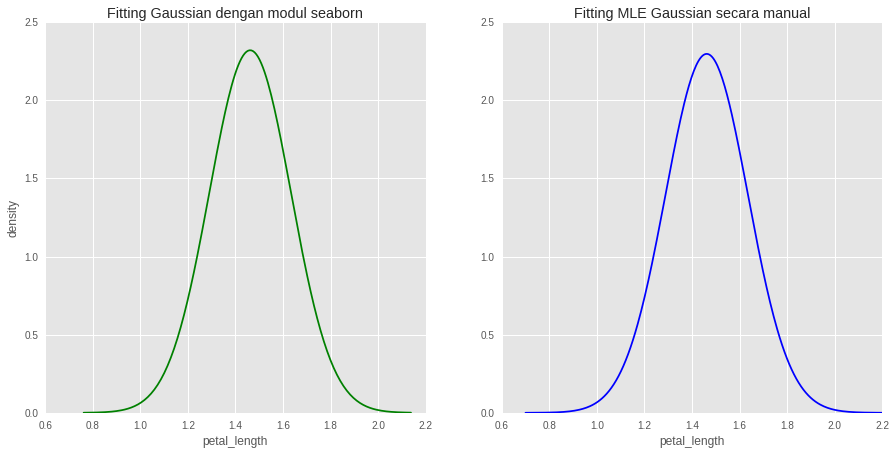

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.distplot(df[df.species == 'setosa'].petal_length, kde=False, fit=norm, hist=False, fit_kws={'color': 'g'}, ax=ax[0])
ax[0].set_ylabel('density')
ax[0].set_title('Fitting Gaussian dengan modul seaborn')

ax[1].set_title('Fitting MLE Gaussian secara manual')
x = np.linspace(0.7, 2.2, 300) # membuat nilai dari [0.6, 2.2] yang dibagi menjadi 300 titik
mu_setosa = df[df.species == 'setosa'].petal_length.mean()
std_setosa = df[df.species == 'setosa'].petal_length.std()
ax[1].plot(x, norm.pdf(x, mu_setosa, std_setosa), color='b')
ax[1].set_xlabel('petal_length')
plt.show()

![Gaussian MLE](http://uai.aliakbars.com/images/mle.gif)

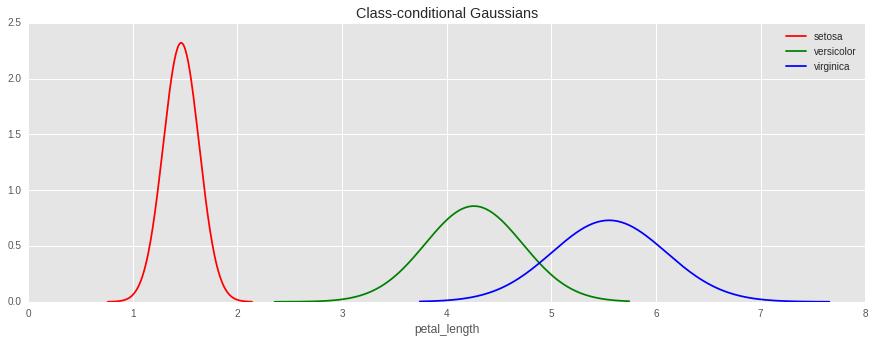

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df[df.species == 'setosa'].petal_length, kde=False, hist=False, fit=norm, fit_kws={'color': 'r', 'label': 'setosa'}, ax=ax)
sns.distplot(df[df.species == 'versicolor'].petal_length, kde=False, hist=False, fit=norm, fit_kws={'color': 'g', 'label': 'versicolor'}, ax=ax)
sns.distplot(df[df.species == 'virginica'].petal_length, kde=False, hist=False, fit=norm, fit_kws={'color': 'b', 'label': 'virginica'}, ax=ax)
plt.title('Class-conditional Gaussians')
plt.legend()
plt.show()